<a href="https://colab.research.google.com/github/itdhirendra/IITRoorke_DS_AIML/blob/main/Introduction_To_Convolutional_NN_%E2%80%93_Assignment_Submitedby_Dhirendra_Kumar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN Cats vs Dogs Classifier - TensorFlow/Keras

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
import numpy as np
import os
from tensorflow.keras.preprocessing import image

In [13]:
# Define Paths
data_dir = 'data/'
train_dir = os.path.join(data_dir, 'train')
validation_dir = os.path.join(data_dir, 'validation')


In [8]:
! mkdir -p /root/.kaggle
! mv kaggle.json /root/.kaggle
import kaggle

In [9]:
!chmod 600 /root/.kaggle/kaggle.json

Click “Join Competition” and accept the rules.
  - If you don’t do this, you’ll always get a 403 error.



In [10]:
! kaggle competitions download -c dogs-vs-cats

In [18]:
! unzip dogs-vs-cats.zip -d ./dogs-vs-cats
! unzip ./dogs-vs-cats/train.zip -d ./dogs-vs-cats/train

Streaming output truncated to the last 5000 lines.
  inflating: ./dogs-vs-cats/train/train/dog.5499.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.55.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.550.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5500.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5501.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5502.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5503.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5504.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5505.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5506.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5507.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5508.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5509.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.551.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5510.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5511.jpg  
  inflating: ./dogs-vs-cats/train/train/dog.5512.jpg  
  inflating: ./dog

In [ ]:
#Directory structure after unzip:
#/dogs-vs-cats/
#├── train/
#│   ├── cat.0.jpg
#│   ├── dog.0.jpg
#│   └── ...

Organize & Split Data

In [19]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [20]:
# Paths
src_dir = './dogs-vs-cats/train'
base_dir = './cats_vs_dogs_data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [29]:
train_dir

'./cats_vs_dogs_data/train'

In [30]:
ls ./dogs-vs-cats/train | head

train/


In [33]:
filenames = os.listdir(src_dir)
print(f"Total images: {len(filenames)}")

cats = [f for f in filenames if f.lower().startswith('cat') and f.endswith('.jpg')]
dogs = [f for f in filenames if f.lower().startswith('dog') and f.endswith('.jpg')]

print(f"Found {len(cats)} cat images and {len(dogs)} dog images")

Total images: 1
Found 0 cat images and 0 dog images


In [35]:
base_dir = './dogs-vs-cats'
zip_file = os.path.join(base_dir, 'train.zip')
extract_dir = os.path.join(base_dir, 'train')
data_dir = os.path.join(extract_dir, 'train')  # This is the final folder with images

In [36]:
# If files are in ./train/train/ move them up one level
if os.path.exists(os.path.join(data_dir, 'dog.0.jpg')):
    print("Fixing folder structure...")
    for file in os.listdir(data_dir):
        shutil.move(os.path.join(data_dir, file), extract_dir)
    os.rmdir(data_dir)

# Update data_dir path
data_dir = extract_dir


Fixing folder structure...


In [31]:
# Create dirs
for category in ['Cat', 'Dog']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)


In [22]:
# Prepare filenames
filenames = os.listdir(src_dir)
cats = [f for f in filenames if f.startswith('cat')]
dogs = [f for f in filenames if f.startswith('dog')]


In [24]:
import os

src_dir = './dogs-vs-cats/train'
all_files = os.listdir(src_dir)
print(f"Total files found: {len(all_files)}")
print(all_files[:5])  # Show sample filenames

Total files found: 1
['train']


In [38]:
# Paths
src_dir = './dogs-vs-cats/train'
base_dir = './cats_vs_dogs_data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

# Create dirs
for category in ['Cat', 'Dog']:
    os.makedirs(os.path.join(train_dir, category), exist_ok=True)
    os.makedirs(os.path.join(test_dir, category), exist_ok=True)

# Prepare filenames
filenames = os.listdir(src_dir)
cats = [f for f in filenames if f.startswith('cat')]
dogs = [f for f in filenames if f.startswith('dog')]

In [41]:

train_cats, test_cats = train_test_split(cats, test_size=0.2, random_state=42)
train_dogs, test_dogs = train_test_split(dogs, test_size=0.2, random_state=42)

In [42]:
# Move files
def move_files(file_list, target_dir):
    for f in file_list:
        shutil.copy(os.path.join(src_dir, f), os.path.join(target_dir, f))


In [43]:

move_files(train_cats, os.path.join(train_dir, 'Cat'))
move_files(test_cats, os.path.join(test_dir, 'Cat'))
move_files(train_dogs, os.path.join(train_dir, 'Dog'))
move_files(test_dogs, os.path.join(test_dir, 'Dog'))

Data Augmentation and Preprocessing

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


In [45]:
val_gen = ImageDataGenerator(rescale=1./255)

In [47]:

train_generator = train_gen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 20000 images belonging to 2 classes.


In [46]:

validation_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

Found 5000 images belonging to 2 classes.


CNN Model Building with TensorFlow/Keras


In [48]:
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile and Train the Model

In [49]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


In [50]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1371s 2s/step - accuracy: 0.5352 - loss: 0.7184 - val_accuracy: 0.5884 - val_loss: 0.6707
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1430s 2s/step - accuracy: 0.5902 - loss: 0.6670 - val_accuracy: 0.6736 - val_loss: 0.5943
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1332s 2s/step - accuracy: 0.6735 - loss: 0.6098 - val_accuracy: 0.7238 - val_loss: 0.5404
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1325s 2s/step - accuracy: 0.7118 - loss: 0.5627 - val_accuracy: 0.7608 - val_loss: 0.5296
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1309s 2s/step - accuracy: 0.7267 - loss: 0.5416 - val_accuracy: 0.7880 - val_loss: 0.4637
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1303s 2s/step - accuracy: 0.7439 - loss: 0.5136 - val_accuracy: 0.7864 - val_loss: 0.4625
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1296s 2s/step - accuracy: 0.7566 - loss: 0.5015 - val_accuracy: 0.8004 - val_loss: 0.4281
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 1307s 2s/step - accuracy: 0.7707 - loss: 0.4773 - 

Evaluate the Model

In [51]:
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 78s 494ms/step - accuracy: 0.7752 - loss: 0.4614
Validation Accuracy: 0.7804


Evaluate and Visualize

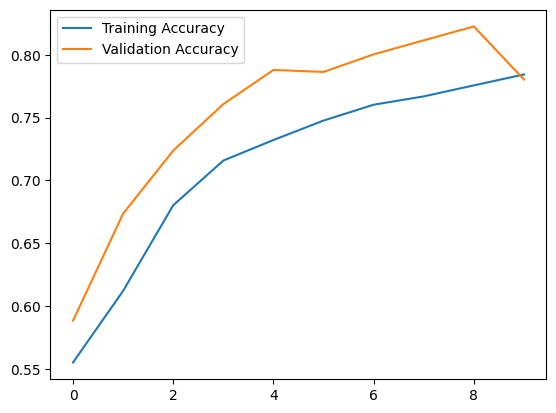

In [52]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot training history
import matplotlib.pyplot as plt

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.show()

Predict New Images

In [53]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image_class(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    pred = model.predict(img_array)
    class_labels = list(train_generator.class_indices.keys())
    return class_labels[np.argmax(pred)]

Prediction on New Images

In [57]:
# Example usage
predict_image_class('/content/european-shorthair-8601492_640.jpg') #Cat Image download from internet


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


'Cat'

In [60]:
def predict_image(model, img_path):
    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)
    img_tensor = np.expand_dims(img_tensor, axis=0)
    img_tensor /= 255.

    prediction = model.predict(img_tensor)
    classes = list(train_generator.class_indices.keys())
    return classes[np.argmax(prediction)]

# Example usage
predict_image(model, '/content/dog-8198719_640.jpg')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


'Dog'

Export Model

In [61]:
model.save('cat_dog_classifier_model.h5')